In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore')
print('Setup completado')


Setup completado


In [2]:
df = pd.read_csv("data/regression_data.csv",sep= ";")
df


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord
0,7895500070,2/13/15,4,1.00,1220,8075,1.0,0,0,2,...,330,1969,0,98001,47.3341,-122.282,1290,7800,240000,"(47.3341,-122.282)"
1,3717000160,10/09/2014,4,2.50,2240,4648,2.0,0,0,3,...,0,2005,0,98001,47.3378,-122.257,2221,4557,287000,"(47.3378,-122.257)"
2,8961960160,10/28/14,4,2.50,3230,16171,2.0,0,3,3,...,710,2001,0,98001,47.3183,-122.253,2640,8517,480000,"(47.3183,-122.253)"
3,4014400292,1/14/15,3,2.50,2714,17936,2.0,0,0,3,...,0,2005,0,98001,47.3185,-122.275,2590,18386,465000,"(47.3185,-122.275)"
4,1115450240,10/22/14,4,2.50,2160,9528,2.0,0,0,3,...,0,1992,0,98001,47.3341,-122.255,2280,9937,360000,"(47.3341,-122.255)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2770601912,04/02/2015,3,3.25,1550,1280,2.0,0,0,3,...,330,2013,0,98199,47.6493,-122.384,1550,1579,570000,"(47.6493,-122.384)"
21593,1070000180,10/15/14,4,3.50,3660,4760,2.0,0,0,3,...,820,2014,0,98199,47.6482,-122.409,3210,4640,1110000,"(47.6482,-122.409)"
21594,7010700308,11/12/2014,4,3.25,3610,4000,2.0,0,0,3,...,970,2007,0,98199,47.6580,-122.396,1980,4000,1010000,"(47.658,-122.396)"
21595,2770601782,08/01/2014,3,2.50,1510,1618,2.5,0,0,3,...,180,2011,0,98199,47.6515,-122.384,1350,1397,453000,"(47.6515,-122.384)"


Dataset de 22 variables con 21.597 registros

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [4]:
df.columns


Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'coord'],
      dtype='object')

Estas son las variables con las que estamos trabajando:

- **'id'** : identificador único de la propiedad
- **'date'** : fecha en la que se vendió la propiedad
- **'bedrooms'** :  *(num. disc)* número de habitaciones
- **'bathrooms'** : *(num. disc)* número de baños
- **'sqft_living'** : superficie habitable
- **'sqft_lot'** : superficie del terreno
- **'floors'** : *(num. disc)* número de pisos
- **'waterfront'** : *(dummy)* si la propiedad tiene vistas al mar
- **'view'** : *(categ)* calidad de las vistas de 0 a 4
- **'condition'** : *(categ)* condición de la propiedad de 1 a 5
- **'grade'** : *(categ)* calidad de la construcción de 1 a 13 (1-3: bajo, 7: promedio, 11-13: alto)
- **'sqft_above'** : superficie interior sobre el nivel del suelo
- **'sqft_basement'** : superficie interior bajo el nivel del suelo
- **'yr_built'** : *(num. disc)* año de construcción
- **'yr_renovated'** : *(num. disc)* año de renovación
- **'zipcode'** : código postal
- **'lat'** : latitud
- **'long'** : longitud
- **'sqft_living15'** : superficie habitable promedio de los 15 vecinos más cercanos
- **'sqft_lot15'** : superficie del terreno promedio de los 15 vecinos más cercanos
- **'price'**: (**objetivo**) precio por el que se vendió la propiedad
- **'coord'** : coordenadas de la propiedad (latitud, longitud)

## 1.- Preprocesar datos

In [5]:
df_1 = df.copy()


### 1.1.- Limpieza de datos

Eliminar datos nulos y duplicados

In [6]:
df_1 = df_1.dropna()

# duplicados
df_1 = df_1.drop_duplicates()

print( f'Se han eliminado {df.shape[0] - df_1.shape[0]} filas')


Se han eliminado 0 filas


Indexar dataset por **'id'** de la propiedad

In [7]:
df_1 = df_1.reset_index(drop=True)  # resetear el índice
df_1 = df_1.set_index('id')  # establecer el 'id' como nuevo índice
df_1.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,coord
id,,,,,,,,,,,,,,,,,,,,,
7895500070,2/13/15,4,1.0,1220,8075,1.0,0,0,2,7,...,330,1969,0,98001,47.3341,-122.282,1290,7800,240000,"(47.3341,-122.282)"
3717000160,10/09/2014,4,2.5,2240,4648,2.0,0,0,3,7,...,0,2005,0,98001,47.3378,-122.257,2221,4557,287000,"(47.3378,-122.257)"
8961960160,10/28/14,4,2.5,3230,16171,2.0,0,3,3,9,...,710,2001,0,98001,47.3183,-122.253,2640,8517,480000,"(47.3183,-122.253)"
4014400292,1/14/15,3,2.5,2714,17936,2.0,0,0,3,9,...,0,2005,0,98001,47.3185,-122.275,2590,18386,465000,"(47.3185,-122.275)"
1115450240,10/22/14,4,2.5,2160,9528,2.0,0,0,3,9,...,0,1992,0,98001,47.3341,-122.255,2280,9937,360000,"(47.3341,-122.255)"


Eliminar columnas que no aportan información para el análisis:
-  **'date'** 
- **'coord'** (ya tenemos **'lat'** y **'long'**)

In [8]:
df_1 = df_1.drop(['date', 'coord'], axis=1)
df_1.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7895500070,4,1.0,1220,8075,1.0,0,0,2,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800,240000
3717000160,4,2.5,2240,4648,2.0,0,0,3,7,2240,0,2005,0,98001,47.3378,-122.257,2221,4557,287000
8961960160,4,2.5,3230,16171,2.0,0,3,3,9,2520,710,2001,0,98001,47.3183,-122.253,2640,8517,480000
4014400292,3,2.5,2714,17936,2.0,0,0,3,9,2714,0,2005,0,98001,47.3185,-122.275,2590,18386,465000
1115450240,4,2.5,2160,9528,2.0,0,0,3,9,2160,0,1992,0,98001,47.3341,-122.255,2280,9937,360000


### 1.2.- Análisis descriptivo

In [9]:
var_num = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

var_num_disc = ['bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'zipcode']

var_num_cont = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


#### Var. Num. Discretas
Para limpiar datos atípicos, tomareos sólo los datos que se encuentren entre el percentil 5% y el 99.7% de cada variable.

##### bedrooms

Valores que toma la variable: [ 4  3  2  5  1  6  8 10  7  9 33 11]


<Axes: xlabel='bedrooms', ylabel='count'>

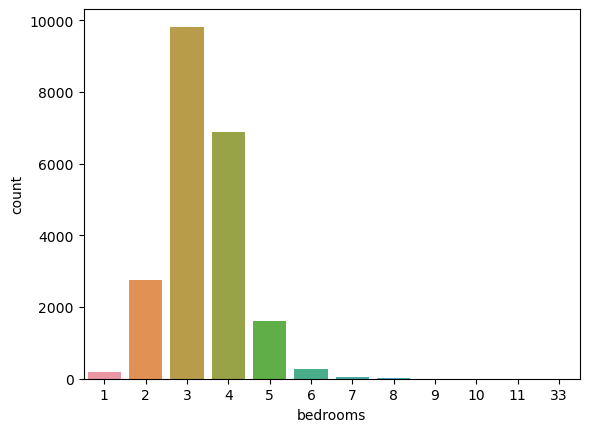

In [10]:
print( 'Valores que toma la variable:', df_1['bedrooms'].unique() )
sns.countplot(x='bedrooms', data=df_1)


In [11]:
df_1['bedrooms'].describe(percentiles = (0.05, 0.25, 0.50, 0.75, 0.95, 0.997)) 


count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
5%           2.000000
25%          3.000000
50%          3.000000
75%          4.000000
95%          5.000000
99.7%        6.000000
max         33.000000
Name: bedrooms, dtype: float64

<Axes: xlabel='bedrooms'>

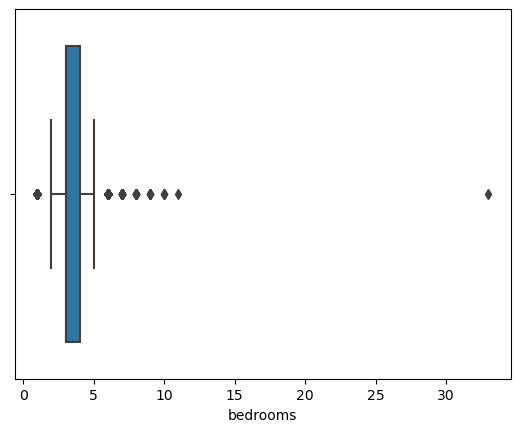

In [12]:
sns.boxplot(x='bedrooms', data=df_1)


La mayoría de propiedades tienen entre 3 y 4 habitaciones

Hay valores atípicos de número de habitaciones de los que nos vamos a deshacer.

In [13]:
PI = 2  # valor del percentil 5% que va a marcar el límite inferior
PS = 6  # valor del percentil 99.7% que va a marcar el límite superior

# eliminamos los valores atípicos fuera del rango 5%-99.7%
df_1_1 = df_1[(df_1['bedrooms'] >= PI) & (df_1['bedrooms'] <= PS)]

print(f'Hemos eliminado {df_1.shape[0] - df_1_1.shape[0]} valores atípicos.')
df_1_1['bedrooms'].value_counts()


Hemos eliminado 258 valores atípicos.


bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
Name: count, dtype: int64

##### bathrooms

Valores que toma la variable: [1.   2.5  2.   1.5  2.25 1.75 2.75 3.   0.75 3.5  4.5  5.25 5.   4.25
 3.25 4.   3.75 5.5  4.75 6.   6.25 1.25 6.5  5.75 7.75 6.75 0.5  8.  ]


<Axes: xlabel='bathrooms', ylabel='Count'>

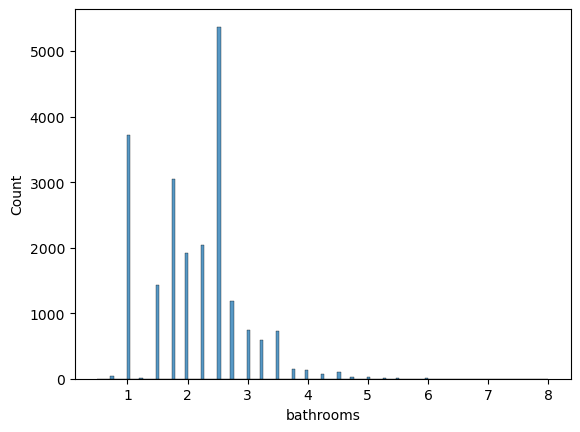

In [14]:
print( 'Valores que toma la variable:', df_1_1['bathrooms'].unique() )
sns.histplot(x='bathrooms', data=df_1_1)


Los valores intermedios de baños en una propiedad significan que son "baños parciales", que pueden incluir inodoro (0.25) y lavamanos (0.5), pero no incluyen ducha o bañera.

In [15]:
df_1_1['bathrooms'].describe(percentiles = (0.05, 0.25, 0.50, 0.75, 0.95, 0.997))



count    21339.000000
mean         2.120847
std          0.758653
min          0.500000
5%           1.000000
25%          1.750000
50%          2.250000
75%          2.500000
95%          3.500000
99.7%        4.750000
max          8.000000
Name: bathrooms, dtype: float64

<Axes: xlabel='bathrooms'>

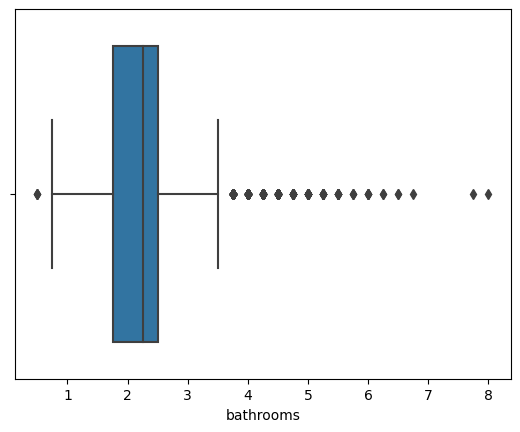

In [16]:
sns.boxplot(x='bathrooms', data=df_1_1)


La mayoría de casas tienen 2 baños completos y 1 baño parcial.

In [17]:
PI = 1  # valor del percentil 5% que va a marcar el límite inferior
PS = 4.75  # valor del percentil 95% que va a marcar el límite superior

# eliminamos los valores atípicos fuera del rango 5%-99.7%
df_1_2 = df_1_1[(df_1_1['bathrooms'] >= PI) & (df_1_1['bathrooms'] <= PS)]

print(f'Hemos eliminado {df_1_1.shape[0] - df_1_2.shape[0]} valores atípicos.')
df_1_2['bathrooms'].value_counts()


Hemos eliminado 103 valores atípicos.


bathrooms
2.50    5372
1.00    3712
1.75    3043
2.25    2040
2.00    1923
1.50    1431
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
4.75      21
1.25       7
Name: count, dtype: int64

##### floors

Valores que toma la variable: [1.  2.  1.5 2.5 3.  3.5]


<Axes: xlabel='floors', ylabel='count'>

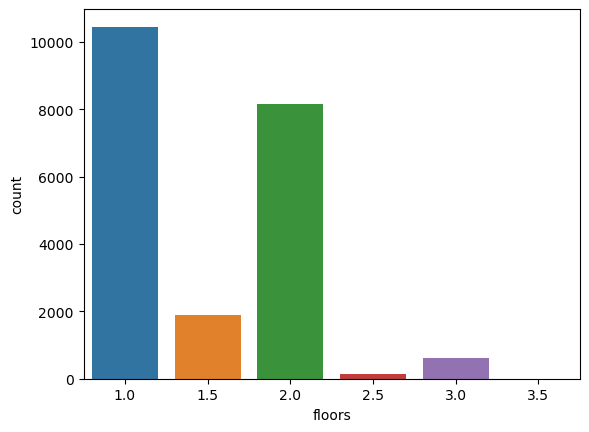

In [18]:
print( 'Valores que toma la variable:', df_1_2['floors'].unique() )
sns.countplot(x='floors', data=df_1_2)


In [19]:
df_1_2['floors'].describe(percentiles = (0.05, 0.25, 0.50, 0.75, 0.95, 0.997))


count    21236.000000
mean         1.496327
std          0.539960
min          1.000000
5%           1.000000
25%          1.000000
50%          1.500000
75%          2.000000
95%          2.000000
99.7%        3.000000
max          3.500000
Name: floors, dtype: float64

<Axes: xlabel='floors'>

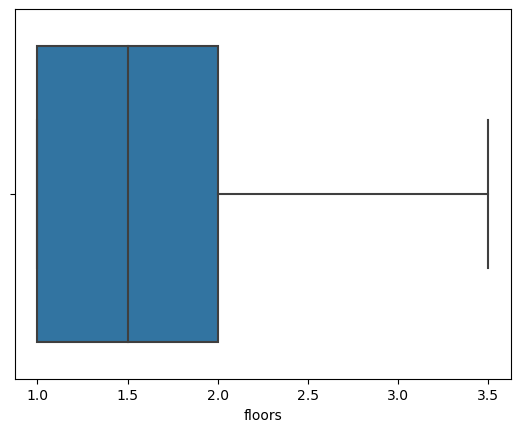

In [20]:
sns.boxplot(x='floors', data=df_1_2)


La mayoría de los pisos tienen entre 1 y 2 pisos, siendo tanto la media como la mediana 1.5.

Esta variable no tiene valores atípicos (teniendo en cuenta que ya se han eliminado algunos outliers en variables anteriores).

##### year built

Valores que toma la variable: [1969 2005 2001 1992 2003 1954 1974 1982 1981 1939 1985 1966 1920 1988
 1950 1978 1998 2007 1993 1979 1962 2006 1919 1972 1959 1963 1977 1989
 1955 1952 1990 1967 2002 1958 1947 1973 1991 1996 1968 1913 1983 1984
 1999 1964 1965 1960 1948 2004 2000 1987 1997 1942 1936 1971 1986 1943
 1961 1912 2009 1946 1953 1976 1975 1980 1909 1970 1994 1908 1903 1938
 1956 1995 1944 2011 2012 2014 2008 2013 2010 1921 1941 1949 1957 1910
 1951 1915 1914 1923 1930 1927 1931 1918 1922 1911 1937 1940 1945 1925
 1933 2015 1906 1900 1934 1916 1928 1935 1932 1905 1926 1917 1924 1907
 1929 1904 1902 1901]


<Axes: xlabel='yr_built', ylabel='Count'>

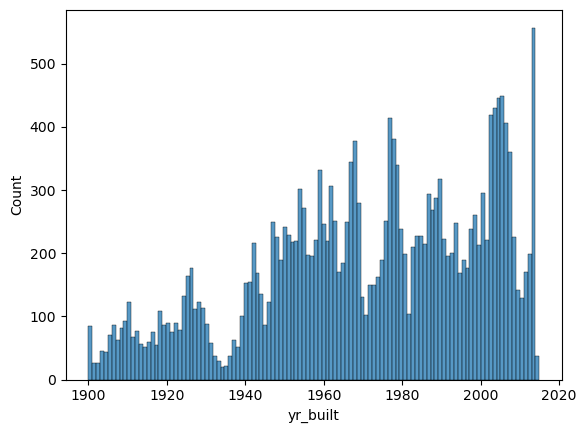

In [21]:
print( 'Valores que toma la variable:', df_1_2['yr_built'].unique() )

L = len( df_1_2['yr_built'].unique() )
sns.histplot(x='yr_built', data=df_1_2, bins=L)


In [22]:
df_1_2['yr_built'].describe(percentiles = (0.05, 0.25, 0.50, 0.75, 0.95, 0.997))


count    21236.000000
mean      1971.296383
std         29.215517
min       1900.000000
5%        1916.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
95%       2011.000000
99.7%     2014.000000
max       2015.000000
Name: yr_built, dtype: float64

La mayoría de las casas se construyeron antes de los 2000, pero el año que más casas se construyeron fue el 2015.

<Axes: xlabel='yr_built'>

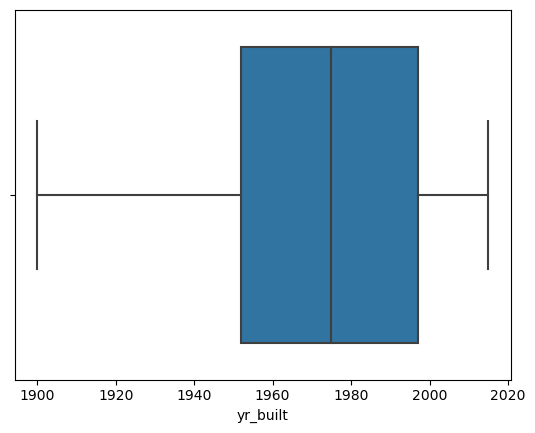

In [23]:
sns.boxplot(x='yr_built', data=df_1_2)


Esta variable no tiene valores atípicos (teniendo en cuenta que ya se han eliminado algunos outliers en variables anteriores).

##### year renovated

Valores que toma la variable: [   0 1957 2009 1990 1975 1982 1979 2007 1993 2001 1983 1967 1981 1987
 2011 2010 1992 2008 2006 1989 2003 2005 2002 1998 1996 1995 1985 1997
 2014 1986 2013 1999 1977 2000 1991 1963 2015 2004 1984 1978 1965 1972
 1945 1964 1974 1962 2012 1988 1980 1976 1954 1994 1956 1970 1958 1953
 1968 1951 1960 1973 1946 1959 1950 1969 1940 1971 1955 1944 1934]


<Axes: xlabel='yr_renovated', ylabel='Count'>

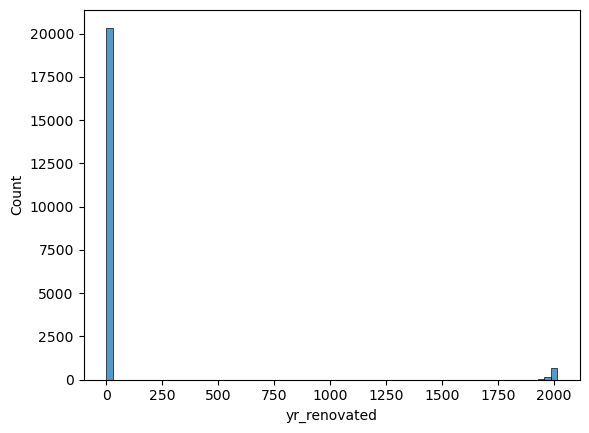

In [24]:
print( 'Valores que toma la variable:', df_1_2['yr_renovated'].unique() )

L = len( df_1_2['yr_renovated'].unique() )
sns.histplot(x='yr_renovated', data=df_1_2, bins=L)


Parece que la mayoría de casas no han sido renovadas (año de renovación 0)

In [25]:
df_1_2['yr_renovated'].describe(percentiles = (0.05, 0.25, 0.50, 0.75, 0.95, 0.997))


count    21236.000000
mean        82.900311
std        398.263482
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
99.7%     2014.000000
max       2015.000000
Name: yr_renovated, dtype: float64

<Axes: xlabel='yr_renovated'>

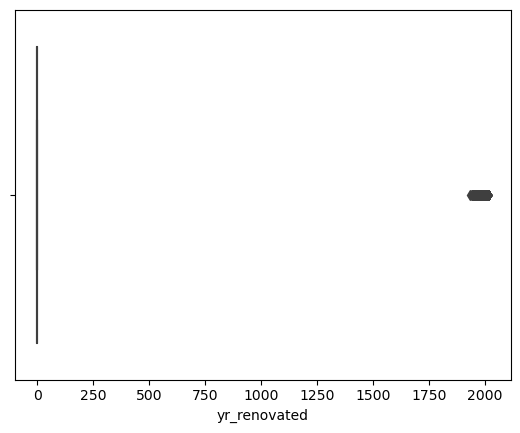

In [26]:
sns.boxplot(x='yr_renovated', data=df_1_2)


el percentil 95% es 0, por lo que está claro que la mayoría de las propiedades no han sido renovadas y esta colunma no aporta información relevante al análisis. Por lo tanto, la eliminamos.

In [27]:
df_1_3 = df_1_2.drop(['yr_renovated'], axis=1)
df_1_3.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,
7895500070,4,1.0,1220,8075,1.0,0,0,2,7,890,330,1969,98001,47.3341,-122.282,1290,7800,240000
3717000160,4,2.5,2240,4648,2.0,0,0,3,7,2240,0,2005,98001,47.3378,-122.257,2221,4557,287000
8961960160,4,2.5,3230,16171,2.0,0,3,3,9,2520,710,2001,98001,47.3183,-122.253,2640,8517,480000
4014400292,3,2.5,2714,17936,2.0,0,0,3,9,2714,0,2005,98001,47.3185,-122.275,2590,18386,465000
1115450240,4,2.5,2160,9528,2.0,0,0,3,9,2160,0,1992,98001,47.3341,-122.255,2280,9937,360000


In [28]:
print(f'Filas del dataset: {df_1_3.shape[0]}')


Filas del dataset: 21236


#### Var. Num. Continuas
Como nuestra variable objetivo es el precio (**'price'**), vamos a analizar las variables continuas en función de esta.

Con la matriz de corelación podemos ver qué variables están correlacionadas entre ellas, así como el grado de correlación con la variable objetivo, el precio.

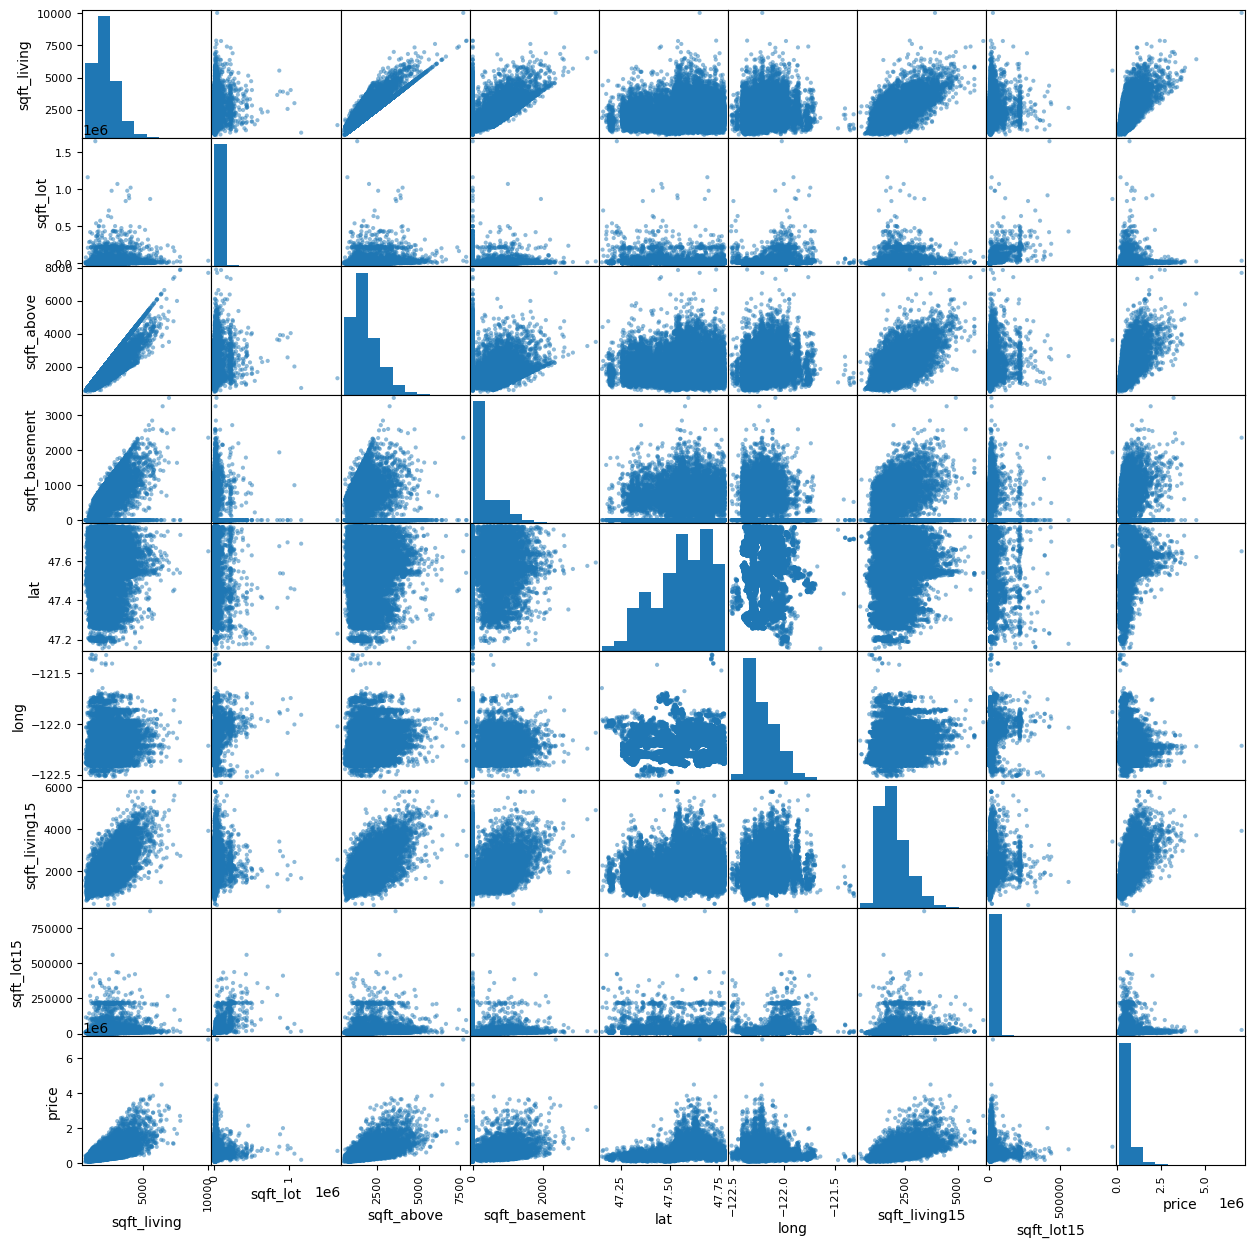

In [29]:
scatter_matrix = pd.plotting.scatter_matrix(df_1_3[var_num_cont], figsize=(15, 15))
plt.show()


En la última fila de la matriz podemos ver las variables de las que se puede intuir cierto grado de correlación con el precio:
- **'sqft_living'** (superficie habitable)
- **'sqft_above'** y **'sqft_basement'** (superficie sobre y bajo el nivel del suelo), que dependen de la variable *'sqft_living'*
- **'sqft_living15'** (superficie habitable promedio de los 15 vecinos más cercanos)

Estas son las variables continuas que nos van a permitir predecir el precio de una propiedad, y en las que nos centraremos.

Para limpiar datos atípicos, tomareos sólo los datos que se encuentren entre el percentil 5% y el 99.7% de cada variable.

##### sqft_living

count    21236.000000
mean      2077.967225
std        878.179131
min        520.000000
5%         960.000000
25%       1440.000000
50%       1920.000000
75%       2550.000000
95%       3730.000000
99.7%     5645.900000
max      10040.000000
Name: sqft_living, dtype: float64


<Axes: xlabel='sqft_living'>

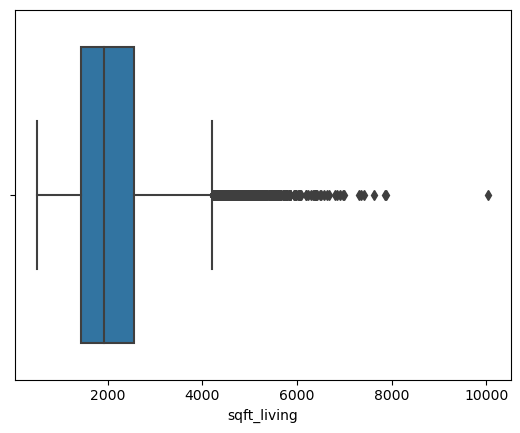

In [30]:
print( df_1_3['sqft_living'].describe(percentiles = (0.05, 0.25, 0.5, 0.75, 0.95, 0.997)) )

sns.boxplot(x='sqft_living', data=df_1_3)


La mayoría de las casas tienen una superficie habitable entre 1000 y 3000 pies cuadrados.

In [31]:
P = 5645  # valor del percentil 99.7% que va a marcar el límite superior

# eliminamos los valores atípicos
df_1_4 = df_1_3[df_1_3['sqft_living'] <= P]

print(f'Hemos eliminado {df_1_3.shape[0] - df_1_4.shape[0]} valores atípicos.')


Hemos eliminado 64 valores atípicos.


##### sqft_above

count    21172.000000
mean      1777.882061
std        781.656843
min        480.000000
5%         860.000000
25%       1200.000000
50%       1560.000000
75%       2200.000000
95%       3330.000000
99.7%     4664.870000
max       5584.000000
Name: sqft_above, dtype: float64


<Axes: xlabel='sqft_above'>

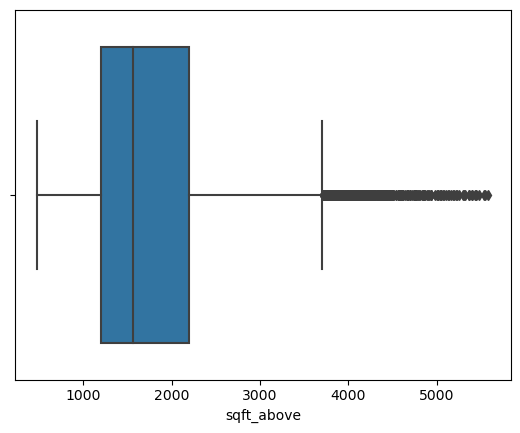

In [32]:
print( df_1_4['sqft_above'].describe(percentiles = (0.05, 0.25, 0.5, 0.75, 0.95, 0.997)) )

sns.boxplot(x='sqft_above', data=df_1_4)


In [33]:
P = 4664  # valor del percentil 99.7% que va a marcar el límite superior
df_1_5 = df_1_4[df_1_4['sqft_above'] <= P]

print(f'Hemos eliminado {df_1_4.shape[0] - df_1_5.shape[0]} valores atípicos.')



Hemos eliminado 64 valores atípicos.


##### sqft_basement

count    21108.000000
mean       287.975223
std        430.505567
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        560.000000
95%       1170.000000
99.7%     1870.000000
max       2720.000000
Name: sqft_basement, dtype: float64


<Axes: xlabel='sqft_basement'>

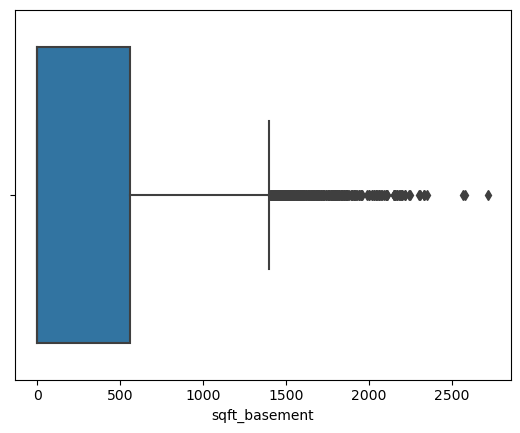

In [34]:
print( df_1_5['sqft_basement'].describe(percentiles = (0.05, 0.25, 0.5, 0.75, 0.95, 0.997)) )

sns.boxplot(x='sqft_basement', data=df_1_5)


In [35]:
P = 1870
df_1_6 = df_1_5[df_1_5['sqft_basement'] <= P]

print(f'Hemos eliminado {df_1_5.shape[0] - df_1_6.shape[0]} valores atípicos.')


Hemos eliminado 63 valores atípicos.


##### sqft_living15

count    21045.000000
mean      1973.450511
std        658.588358
min        399.000000
5%        1140.000000
25%       1490.000000
50%       1840.000000
75%       2350.000000
95%       3230.000000
99.7%     4398.680000
max       5790.000000
Name: sqft_living15, dtype: float64


<Axes: xlabel='sqft_living15'>

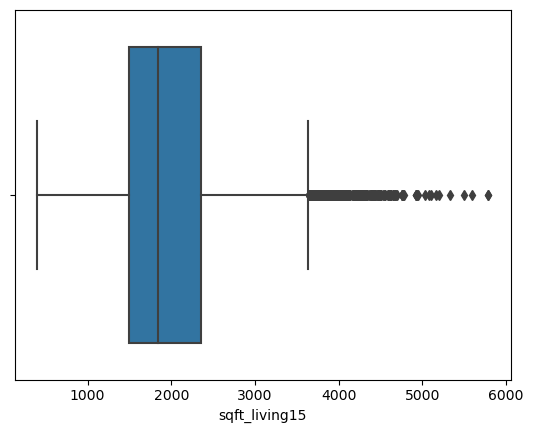

In [36]:
print( df_1_6['sqft_living15'].describe(percentiles = (0.05, 0.25, 0.5, 0.75, 0.95, 0.997)) )

sns.boxplot(x='sqft_living15', data=df_1_6)


In [37]:
P = 4398
df_1_7 = df_1_6[df_1_6['sqft_living15'] <= P]

print(f'Hemos eliminado {df_1_6.shape[0] - df_1_7.shape[0]} valores atípicos.')


Hemos eliminado 64 valores atípicos.


In [38]:
print(f'Filas del dataset: {df_1_7.shape[0]}')


Filas del dataset: 20981


#### Variables categóricas

In [39]:
var_categ = ['waterfront', 'view', 'condition', 'grade']


##### waterfront

<Axes: xlabel='waterfront', ylabel='count'>

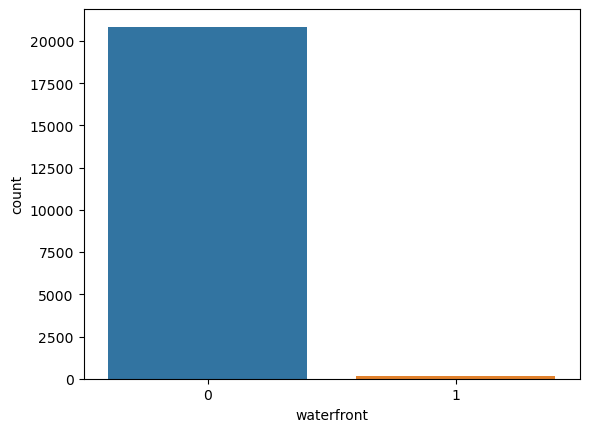

In [40]:
sns.countplot(x='waterfront', data=df_1_7)


La mayoría de las propiedades no tienen vistas al agua.

##### view

<Axes: xlabel='view', ylabel='count'>

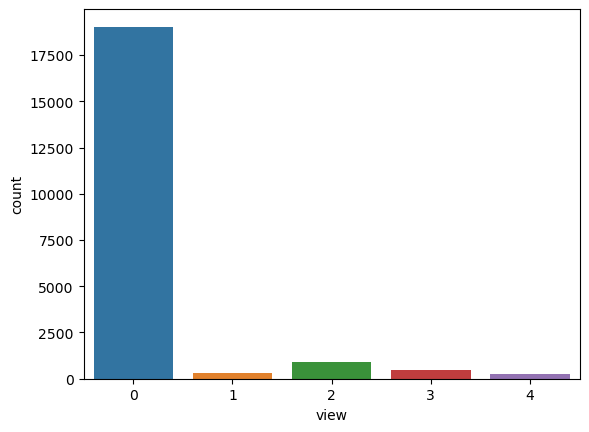

In [41]:
sns.countplot(x='view', data=df_1_7)


La mayoría de las propiedades no tienen buenas vistas.

##### condition

<Axes: xlabel='condition', ylabel='count'>

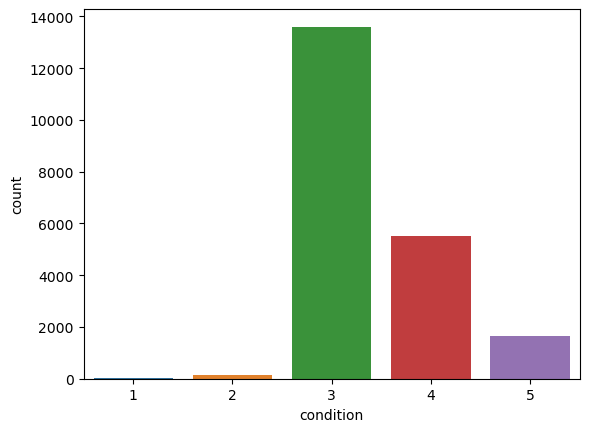

In [42]:
sns.countplot(x='condition', data=df_1_7)


In [43]:
df_1_7['condition'].describe(percentiles=(0.05, 0.25, 0.5, 0.75, 0.9, 0.997))


count    20981.000000
mean         3.412325
std          0.650364
min          1.000000
5%           3.000000
25%          3.000000
50%          3.000000
75%          4.000000
90%          4.000000
99.7%        5.000000
max          5.000000
Name: condition, dtype: float64

La condición de la mayorías de las propiedades está entre 3 y 4, que es media-buena.

##### grade

<Axes: xlabel='grade', ylabel='count'>

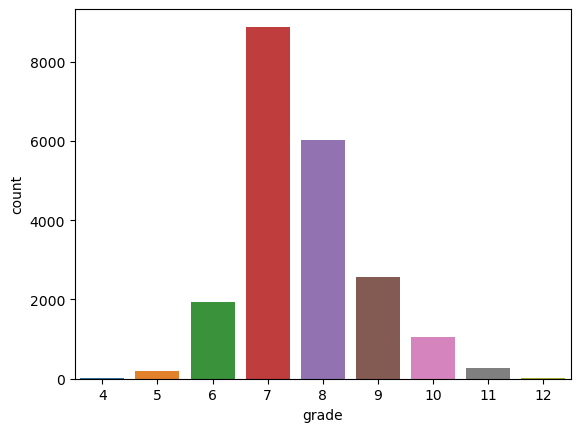

In [44]:
sns.countplot(x='grade', data=df_1_7)


In [45]:
df_1_7['grade'].describe(percentiles=(0.05, 0.25, 0.5, 0.75, 0.9, 0.997))


count    20981.000000
mean         7.630666
std          1.101802
min          4.000000
5%           6.000000
25%          7.000000
50%          7.000000
75%          8.000000
90%          9.000000
99.7%       11.000000
max         12.000000
Name: grade, dtype: float64

La mayoría de las propiedades tienen una calidad de construcción entre 7 y 8, que es media.

In [46]:
# veamos de cuántos valores atípicos nos hemos deshecho en total
print( f'En total hemos eliminado {df_1.shape[0] - df_1_7.shape[0]} filas en la fase de limpieza de datos.' )


En total hemos eliminado 616 filas en la fase de limpieza de datos.


In [74]:
df_cat = df_1_7.copy()

def categorizar_grade(v):
    if v in [1, 2, 3]:
        return 'Baja'
    elif v in [4, 5, 6, 7, 8, 9, 10]:
        return 'Media'
    elif v in [11, 12, 13]:
        return 'Alta'

df_cat['grade_cat'] = df_cat['grade'].apply(categorizar_grade)

fig = make_subplots(rows=2, cols=2, subplot_titles=("Vistas al agua", "Calidad de las vistas", "Condición de la propiedad", "Calidad de la construcción"), specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['No vistas al agua', 'Vistas al agua'], values=df_cat['waterfront'].value_counts().values, name='Vistas al mar'), 1, 1)
fig.add_trace(go.Pie(labels=['0', '2', '3', '1', '4'], values=df_cat['view'].value_counts().values, name='Calidad de las vistas'), 1, 2)
fig.add_trace(go.Pie(labels=['3', '4', '5', '2', '1'], values=df_cat['condition'].value_counts().values, name='Condición de la propiedad'), 2, 1)
fig.add_trace(go.Pie(labels=['Media', 'Alta'], values=df_cat['grade_cat'].value_counts().values, name='Calidad de la construcción'), 2, 2)

fig.update_traces(hole=0.4)
fig.update_layout(title_text="Distribución de las variables categóricas")
fig.show()


## 2.- Relevancia y Estandarización

In [80]:
df_2 = df_1_7.copy()


### 2.1.- Relevancia de variables

In [76]:
df_2.columns


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

Veamos el grado de correlación entre las variables del dataset

<Axes: >

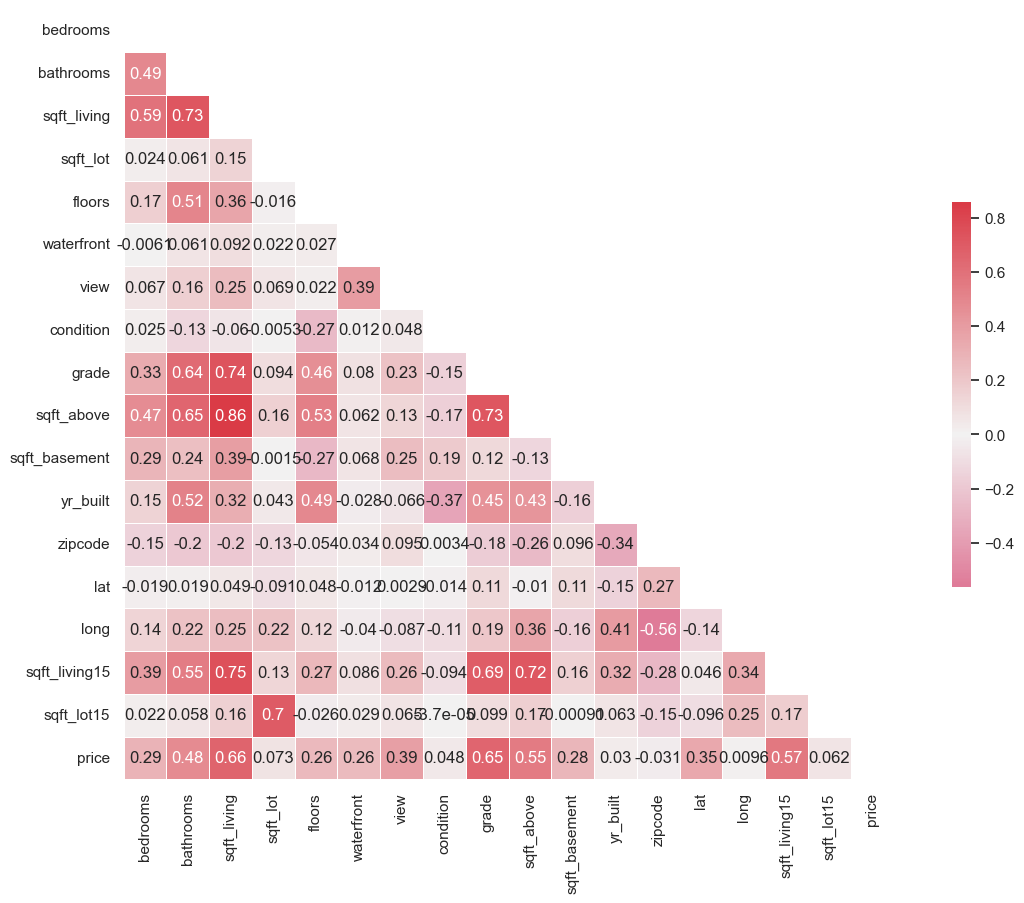

In [78]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df_2.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_2.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5})


Podemos observar que las variables 
- **'sqft_lot'**
- **'condition'**
- **'yr_built'**
- **'zipcode'**
- **'long'**
- **'sqft_lot15'**  

tienen una correlación muy baja con nuestra variable objetivo **'price'**. Por lo que no las vamos a tener en cuenta para el entrenamiento del modelo.

In [79]:
var_drop = ['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15']

df_2_1 = df_2.drop(var_drop, axis=1)
df_2_1.head()


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,price
id,,,,,,,,,,,,
7895500070,4,1.0,1220,1.0,0,0,7,890,330,47.3341,1290,240000
3717000160,4,2.5,2240,2.0,0,0,7,2240,0,47.3378,2221,287000
8961960160,4,2.5,3230,2.0,0,3,9,2520,710,47.3183,2640,480000
4014400292,3,2.5,2714,2.0,0,0,9,2714,0,47.3185,2590,465000
1115450240,4,2.5,2160,2.0,0,0,9,2160,0,47.3341,2280,360000


### 2.2.- Estandarización de variables continuas
para que las variables continuas tengan el mismo peso en el modelo, vamos a estandarizarlas.

In [90]:
from sklearn.preprocessing import StandardScaler
var_objetivo = ['price']
var_est = ['sqft_living', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']


In [91]:
scaler = StandardScaler()
datos_estand = scaler.fit(df_2_1[var_est])
vect_est = datos_estand.transform(df_2_1[var_est])  # es un array
df_est = pd.DataFrame(vect_est, columns=var_est).set_index(df_2_1.index)
df_est.head()


,sqft_living,sqft_above,sqft_basement,lat,sqft_living15
id,,,,,
7895500070,-1.011795,-1.153907,0.115817,-1.619318,-1.052049
3717000160,0.244392,0.636668,-0.673398,-1.592749,0.398782
8961960160,1.463632,1.008046,1.024609,-1.732772,1.051734
4014400292,0.828149,1.265358,-0.673398,-1.731336,0.973816
1115450240,0.145867,0.530560,-0.673398,-1.619318,0.490725


In [94]:
# juntar las variables estandarizadas con el resto del dataaset
df_2_2 = df_2_1.drop(var_est+var_objetivo, axis=1)
df_2_2 = pd.concat([df_2_2, df_est, df_2_1[var_objetivo]], axis=1)



Este es nuestro dataset edfinitivo para el entrenamiento del modelo:

In [95]:
df_2_2


,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_living,sqft_above,sqft_basement,lat,sqft_living15,price
id,,,,,,,,,,,,
7895500070,4,1.00,1.0,0,0,7,-1.011795,-1.153907,0.115817,-1.619318,-1.052049,240000
3717000160,4,2.50,2.0,0,0,7,0.244392,0.636668,-0.673398,-1.592749,0.398782,287000
8961960160,4,2.50,2.0,0,3,9,1.463632,1.008046,1.024609,-1.732772,1.051734,480000
4014400292,3,2.50,2.0,0,0,9,0.828149,1.265358,-0.673398,-1.731336,0.973816,465000
1115450240,4,2.50,2.0,0,0,9,0.145867,0.530560,-0.673398,-1.619318,0.490725,360000
...,...,...,...,...,...,...,...,...,...,...,...,...
2770601912,3,3.25,2.0,0,0,9,-0.605382,-0.716211,0.115817,0.644033,-0.646876,570000
1070000180,4,3.50,2.0,0,0,9,1.993201,1.432479,1.287681,0.636134,1.939998,1110000
7010700308,4,3.25,2.0,0,0,9,1.931623,1.167208,1.646415,0.706505,0.023218,1010000


## 3.- Entrenamiento modelo ML
Vamos a crear un modelo de regresión lineal para predecir el precio de una propiedad en función de las variables que hemos seleccionado en el análisis descriptivo, que son:

- **'sqft_living'** (superficie habitable)
- **'sqft_above'** (superficie interior sobre el nivel del suelo)
- **'sqft_basement'** (superficie sobre y bajo el nivel del suelo)
- **'sqft_living15'** (superficie habitable promedio de los 15 vecinos más cercanos)


In [ ]:
df_3 = df_2_2.copy()


## 4.- Evaluación modelo ML